In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
# !pip install tensorflow
# import pickle
# import tensorflow as tf
#  UpSampling2D, BatchNormalization
sys.path.insert(0,'../../../')
from gp2 import Runner

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
!locate gp2


/lib/modules/5.4.0-105-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-105-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/lib/modules/5.4.0-110-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-110-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/lib/modules/5.4.0-42-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-42-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/lib/modules/5.4.0-64-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-64-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/raid/alphafold_data/pdb_mmcif/mmcif_files/1gp2.cif
/raid/alphafold_data/pdb_mmcif/mmcif_files/3gp2.cif
/raid/alphafold_data/pdb_mmcif/mmcif_files/4gp2.cif
/raid/alphafold_data/pdb_mmcif/mmcif_files/6gp2.cif
/raid/mpsych/gp2_lucchi_augmented_images.npy
/raid/mpsych/gp2_lucchi_augmented_images_plus.npy
/raid/mpsych/gp2_lucchi_augmented_images_plus2.npy
/raid/mpsych/gp2_lucchi_augmented_masks.npy
/raid/mpsych/gp2_lucchi_au

In [4]:

R = Runner(verbose=True)

*** GP2  Unet ***
Working directory: /tmp/tmp4e1m2uo4GP2
Using default discriminator (CNN)


In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_unnormalized_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_unnormalized_masks.npy')

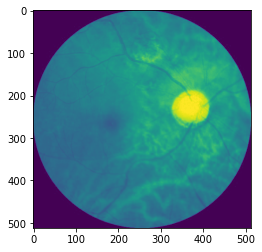

In [6]:
plt.imshow(images[500])

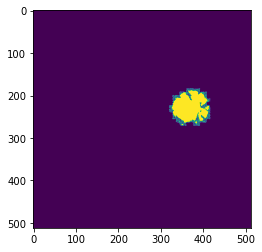

In [7]:
plt.imshow(masks[500])

In [8]:
len(images)

6392

In [9]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [10]:
#
#
R.setup_data(images, masks, dataset_size=6392, weights=weights)

Weights OK!


In [11]:
RUNS = 10

In [12]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')

***
RUN: 0
Epoch 1/100
5/5 [==============================] - 33s 4s/step - loss: 1.2988 - dice_coeff: 0.4178 - val_loss: 1.4894 - val_dice_coeff: 0.3324
Epoch 2/100
5/5 [==============================] - 7s 2s/step - loss: 0.9973 - dice_coeff: 0.5235 - val_loss: 1.5399 - val_dice_coeff: 0.3468
Epoch 3/100
5/5 [==============================] - 7s 2s/step - loss: 0.8750 - dice_coeff: 0.5748 - val_loss: 1.5796 - val_dice_coeff: 0.3555
Epoch 4/100
5/5 [==============================] - 7s 2s/step - loss: 0.7919 - dice_coeff: 0.6056 - val_loss: 1.5863 - val_dice_coeff: 0.3604
Epoch 5/100
5/5 [==============================] - 7s 2s/step - loss: 0.7337 - dice_coeff: 0.6326 - val_loss: 1.5805 - val_dice_coeff: 0.3634
Epoch 6/100
5/5 [==============================] - 7s 2s/step - loss: 0.7097 - dice_coeff: 0.6439 - val_loss: 1.5810 - val_dice_coeff: 0.3670
Epoch 7/100
5/5 [==============================] - 7s 2s/step - loss: 0.6871 - dice_coeff: 0.6534 - val_loss: 1.5655 - val_dice_coeff: 0

In [13]:
R.classifier_scores

[[1.1148645877838135, 0.46069812774658203],
 [0.9895804524421692, 0.49084344506263733],
 [0.9085877537727356, 0.5130712985992432],
 [0.8207017183303833, 0.5182751417160034],
 [0.7350916266441345, 0.5533415675163269],
 [0.561126172542572, 0.6692309975624084],
 [0.6037961840629578, 0.6377751231193542],
 [0.5510054230690002, 0.6842057704925537],
 [0.4987000823020935, 0.7022629380226135],
 [0.4410443603992462, 0.7377004027366638]]

In [14]:
R.discriminator_scores

[[1.4055004119873047, 0.8903394341468811],
 [1.2888823747634888, 0.9190600514411926],
 [0.9740662574768066, 0.9295039176940918],
 [1.3732078075408936, 0.9033942818641663],
 [1.1808093786239624, 0.9216710329055786],
 [1.3851730823516846, 0.9007833003997803],
 [1.444687843322754, 0.9190600514411926],
 [1.1027144193649292, 0.9164490699768066],
 [0.6809885501861572, 0.9503916501998901],
 [1.3616350889205933, 0.9164490699768066]]

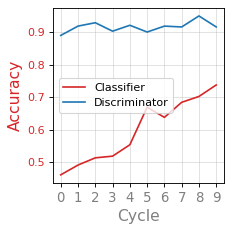

In [15]:
R.plot()

In [16]:
R.classifier_scores

[[1.1148645877838135, 0.46069812774658203],
 [0.9895804524421692, 0.49084344506263733],
 [0.9085877537727356, 0.5130712985992432],
 [0.8207017183303833, 0.5182751417160034],
 [0.7350916266441345, 0.5533415675163269],
 [0.561126172542572, 0.6692309975624084],
 [0.6037961840629578, 0.6377751231193542],
 [0.5510054230690002, 0.6842057704925537],
 [0.4987000823020935, 0.7022629380226135],
 [0.4410443603992462, 0.7377004027366638]]

In [17]:
R.discriminator_scores

[[1.4055004119873047, 0.8903394341468811],
 [1.2888823747634888, 0.9190600514411926],
 [0.9740662574768066, 0.9295039176940918],
 [1.3732078075408936, 0.9033942818641663],
 [1.1808093786239624, 0.9216710329055786],
 [1.3851730823516846, 0.9007833003997803],
 [1.444687843322754, 0.9190600514411926],
 [1.1027144193649292, 0.9164490699768066],
 [0.6809885501861572, 0.9503916501998901],
 [1.3616350889205933, 0.9164490699768066]]

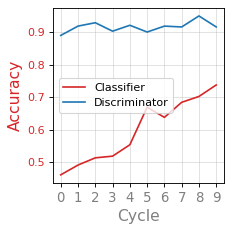

In [18]:
R.plot()